# 앙상블

- (개정판)파이썬 라이브러리를 활용한 머신러닝, 한빛미디어, 2019.
    - 2.3.6 앙상블(ensemble)

## 공통

In [ ]:
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [2]:
from preamble import *

## 결정 트리의 앙상블

### ENS-Q1. 랜덤 포레스트의 특성을 확인하세요.
- 샘플이 100개이고,가우스 노이즈는 0.25인 0/1로 구성된 데이터를 make_moons를 사용해서 작성하세요.
- 분류 특성을 고려해서 학습 데이터와 테스트 데이터를 분리하세요.
- 랜덤 포레스트(RandomForestClassifier)를 사용하고, 분류기는 5개로 지정하여 객체를 생성하세요.
- 학습을 진행하세요.

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=777)
X_train, X_test, y_trian, y_test = train_test_split(X, y, stratify=y, random_state=777)

forest = RandomForestClassifier(n_estimators=5, random_state=777) # 결정트리 5개 쓸게 많으면 과대적합, 적으면 과소적합 적절한 매직 넘버 5
forest.fit(X_train, y_trian)

RandomForestClassifier(n_estimators=5, random_state=777)

### ENS-Q2. 랜덤 포레스트의 특성을 시각적으로 확인하세요.
- 2X3 서브 그래프를 작성합니다.
- 개별 분류기 5개와 최종 분류기 1개를 시각적으로 표현하세요.
- mglearn 패키지의 plot_tree_partition() 함수를 활용하세요.

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title(f"트리 {i}")
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X, ax=axes[-1, -1])

### ENS-Q3. 랜덤 포레스트를 활용하여 분류 문제를 해결하세요.
- 랜덤 포레스트를 활용하여 기존의 유방암 데이터를 분석하세요.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=999)

forest = RandomForestClassifier(n_estimators=100, random_state=999)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(forest.score(X_train, y_train))
print(accuracy_score(y_pred, y_test))

1.0
0.9790209790209791


### ENS-Q4. 랜덤 포레스트의 중요도를 그래프로 표현하세요.
- 랜덤 포레스트를 활용하여 기존의 유방암 데이터를 분석하세요.

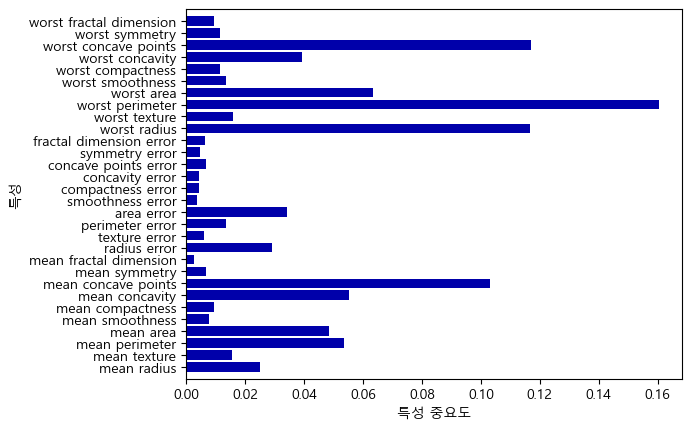

### ENS-Q5. 그래디언트부스팅 분류기를 활용한 분류 문제를 해결하세요.

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


### ENS-Q6. 그래디언트부스팅 분류기의 제약 조건을 추가하세요.

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


### ENS-Q7. 그래디언트부스팅 분류기의 lr 제약 조건을 추가하세요.

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.958


### ENS-Q8. 그래디언트부스팅의 중요도를 그래프로 표현하세요.

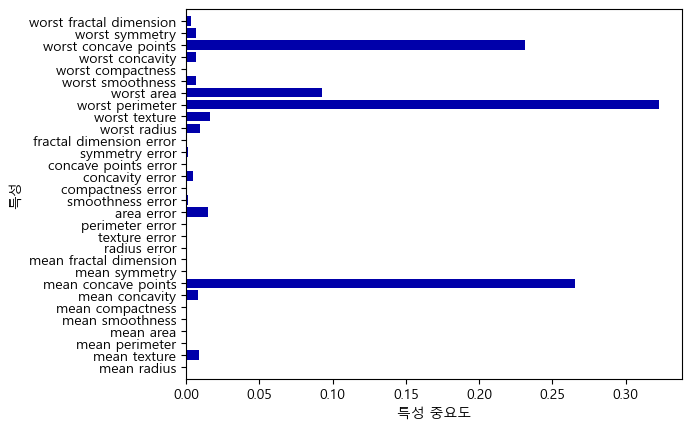